In [55]:
import pandas as pd
import numpy as np
import scipy.stats

In [56]:
#ALL 2002~2012년데이터
df_2002 = pd.read_excel("../데이터자료/ALL(IRS,CRS,Basis,KTB)_2002.xlsx")
df = pd.read_excel("../데이터자료/join_data.xlsx")
# 원래데이터의 필요한것만 가져오기
df_2012=df[['DateTime', '종가_ex','1Y_Mid_irs','2Y_Mid_irs','3Y_Mid_irs','5Y_Mid_irs','10Y_Mid_irs',
 '1Y_Mid_crs','2Y_Mid_crs','3Y_Mid_crs','5Y_Mid_crs','10Y_Mid_crs', 
 '국고1년','국고3년','국고5년','국고10년','통안364일','통안2년', 
 '1Y_베이시스', '2Y_베이시스', '3Y_베이시스', '5Y_베이시스','10Y_베이시스']]

# 2012년도 데이터와의 결합을 위한 컬럼명 통일
df_2002.columns=['DateTime','국고1년','국고3년','국고5년','국고10년','통안364일','통안2년',
                  '1Y_Mid_irs','2Y_Mid_irs','3Y_Mid_irs','5Y_Mid_irs','10Y_Mid_irs',
                   '1Y_Mid_crs','2Y_Mid_crs','3Y_Mid_crs','5Y_Mid_crs','10Y_Mid_crs',
                   '1Y_베이시스', '2Y_베이시스', '3Y_베이시스', '5Y_베이시스','10Y_베이시스']

df_all= pd.concat([df_2002,df_2012]).reset_index(drop='index')

In [57]:
#시간데이터 일치화
df_all["DateTime"] = pd.to_datetime(df_all["DateTime"], format="%Y-%m-%d")
df_all["DateTime"] = df_all["DateTime"].dt.strftime('%Y-%m-%d')


In [58]:
df_all = df_all.set_index(df_all['DateTime'])
df_all = df_all.drop(columns='DateTime')
df_all.head()


,국고1년,국고3년,국고5년,국고10년,통안364일,통안2년,1Y_Mid_irs,2Y_Mid_irs,3Y_Mid_irs,5Y_Mid_irs,...,2Y_Mid_crs,3Y_Mid_crs,5Y_Mid_crs,10Y_Mid_crs,1Y_베이시스,2Y_베이시스,3Y_베이시스,5Y_베이시스,10Y_베이시스,종가_ex
DateTime,,,,,,,,,,,,,,,,,,,,,
2002-08-01,5.07,5.30,5.48,5.91,6.49,4.73,4.90,5.08,5.51,6.10,...,-40.0,-40.0,-39.0,5.16,5.48,5.97,NaN,5.16,5.50,NaN
2002-08-02,5.02,5.22,5.41,5.86,6.42,4.67,4.82,5.01,5.47,6.02,...,-40.0,-39.0,-40.0,5.09,5.39,5.89,NaN,5.09,5.41,NaN
2002-08-05,4.90,5.09,5.27,5.71,6.27,4.54,4.69,4.88,5.32,5.87,...,-39.0,-39.0,-40.0,5.00,5.26,5.68,NaN,5.00,5.27,NaN
2002-08-06,4.97,5.17,5.36,5.78,6.34,4.64,4.78,4.97,5.38,5.94,...,-39.0,-40.0,-40.0,5.05,5.32,5.73,NaN,5.05,5.32,NaN
2002-08-07,4.93,5.16,5.34,5.74,6.28,4.60,4.77,4.95,5.35,5.89,...,-39.0,-39.0,-39.0,5.03,5.30,5.68,NaN,5.03,5.32,NaN


In [59]:
# 전월대비 이자율 변화로 할 때 계산
df_all_return = df_all - df_all.shift(1)
# 전월대비 수익률 변화로 할 때
# df_all_return = df_all.pct_change()
# df_all_return = pd.DataFrame(df_all_return) * 100
df_all_return = df_all_return.dropna()
df_all_return = df_all_return.drop("종가_ex",axis=1)
df_all_return.head()

,국고1년,국고3년,국고5년,국고10년,통안364일,통안2년,1Y_Mid_irs,2Y_Mid_irs,3Y_Mid_irs,5Y_Mid_irs,...,1Y_Mid_crs,2Y_Mid_crs,3Y_Mid_crs,5Y_Mid_crs,10Y_Mid_crs,1Y_베이시스,2Y_베이시스,3Y_베이시스,5Y_베이시스,10Y_베이시스
DateTime,,,,,,,,,,,,,,,,,,,,,
2012-08-02,-0.03,-0.04,-0.04,-0.04,-0.03,-0.05,-0.03,-0.05,-0.05,-0.05,...,-0.01,0.030,0.04,0.04,0.04,2.0,8.0,9.0,9.0,9.0
2012-08-03,-0.02,-0.02,-0.07,-0.07,-0.02,-0.01,-0.03,-0.03,-0.03,-0.03,...,-0.01,-0.015,-0.02,-0.08,-0.15,2.0,1.5,1.0,-5.0,-13.0
2012-08-06,0.01,0.01,0.00,0.00,0.01,0.01,0.02,0.02,0.02,0.02,...,0.00,-0.025,-0.03,-0.04,-0.04,-2.0,-4.5,-5.0,-6.0,-5.0
2012-08-07,-0.01,0.00,0.00,0.00,-0.01,-0.01,0.01,0.00,0.00,0.01,...,0.02,0.015,0.00,-0.07,-0.08,1.0,1.5,0.0,-8.0,-10.0
2012-08-08,-0.01,-0.02,-0.02,-0.02,-0.01,-0.01,0.01,0.02,0.02,0.02,...,0.01,0.000,0.00,-0.02,-0.04,0.0,-2.0,-2.0,-4.0,-7.0


In [60]:
df_all_return = pd.merge(df_all_return, df_all["종가_ex"] , how='left', on='DateTime')

In [61]:
df_all_return

,국고1년,국고3년,국고5년,국고10년,통안364일,통안2년,1Y_Mid_irs,2Y_Mid_irs,3Y_Mid_irs,5Y_Mid_irs,...,2Y_Mid_crs,3Y_Mid_crs,5Y_Mid_crs,10Y_Mid_crs,1Y_베이시스,2Y_베이시스,3Y_베이시스,5Y_베이시스,10Y_베이시스,종가_ex
DateTime,,,,,,,,,,,,,,,,,,,,,
2012-08-02,-0.03,-0.04,-0.04,-0.04,-0.03,-0.05,-0.03,-0.05,-0.05,-0.05,...,0.030,0.04,0.04,0.04,2.0,8.0,9.0,9.0,9.0,1131.7
2012-08-03,-0.02,-0.02,-0.07,-0.07,-0.02,-0.01,-0.03,-0.03,-0.03,-0.03,...,-0.015,-0.02,-0.08,-0.15,2.0,1.5,1.0,-5.0,-13.0,1134.8
2012-08-06,0.01,0.01,0.00,0.00,0.01,0.01,0.02,0.02,0.02,0.02,...,-0.025,-0.03,-0.04,-0.04,-2.0,-4.5,-5.0,-6.0,-5.0,1129.0
2012-08-07,-0.01,0.00,0.00,0.00,-0.01,-0.01,0.01,0.00,0.00,0.01,...,0.015,0.00,-0.07,-0.08,1.0,1.5,0.0,-8.0,-10.0,1128.8
2012-08-08,-0.01,-0.02,-0.02,-0.02,-0.01,-0.01,0.01,0.02,0.02,0.02,...,0.000,0.00,-0.02,-0.04,0.0,-2.0,-2.0,-4.0,-7.0,1128.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25,-0.02,-0.06,-0.07,-0.09,-0.01,-0.05,-0.04,-0.08,-0.07,-0.09,...,-0.090,-0.07,-0.11,-0.11,-4.0,-1.0,0.0,-2.0,0.0,1313.7
2022-07-26,0.01,-0.03,-0.02,-0.03,0.01,0.00,-0.01,-0.02,-0.03,-0.03,...,-0.030,-0.03,-0.02,-0.02,2.0,-1.0,0.0,1.0,1.0,1307.6
2022-07-27,0.00,-0.03,-0.05,-0.06,0.02,-0.01,-0.01,-0.05,-0.06,-0.06,...,-0.010,-0.01,-0.01,-0.01,2.0,4.0,5.0,5.0,5.0,1313.3


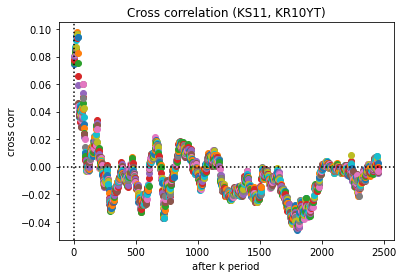

In [62]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_return['국고1년'])
exchange_data = np.array(df_all_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(2457):
    # print(f'국고1년채와 환율과의 {i}일 후 상관계수 값 : {cc[i] : .5f}')

for i in range(2457):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()

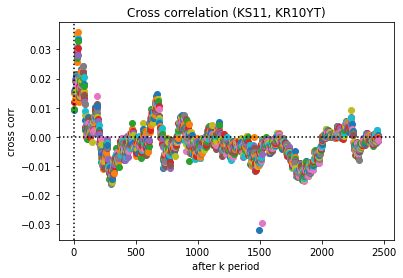

In [63]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_return['국고3년'])
exchange_data = np.array(df_all_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(2457):
    # print(f'국고3년채와 환율과의 {i}일 후 상관계수 값 : {cc[i] : .5f}')

for i in range(2457):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()


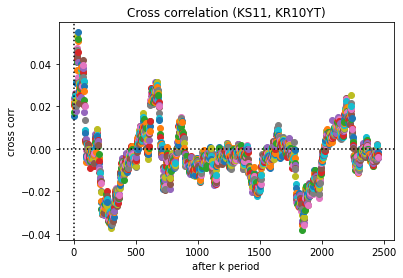

In [64]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_return['국고5년'])
exchange_data = np.array(df_all_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(2457):
   # print(f'국고5년채와 환율과의 {i}일 후 상관계수 값 : {cc[i] : .5f}')

for i in range(2457):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()

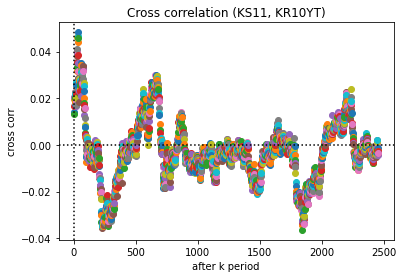

In [65]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_return['국고10년'])
exchange_data = np.array(df_all_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(2457):
   # print(f'국고10년채와 환율과의 {i}일 후 상관계수 값 : {cc[i] : .5f}')

for i in range(2457):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()

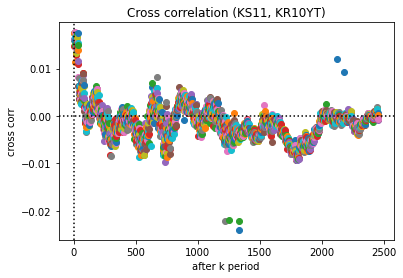

In [66]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_return['통안364일'])
exchange_data = np.array(df_all_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(2457):
   # print(f'통안364일채와 환율과의 {i}일 후 상관계수 값 : {cc[i] : .5f}')

for i in range(2457):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()

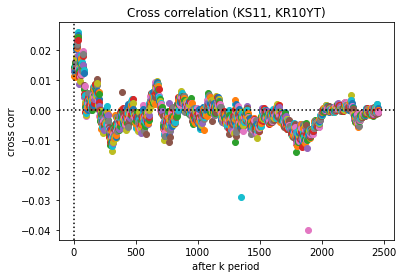

In [67]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_return['통안2년'])
exchange_data = np.array(df_all_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(2457):
    # print(f'툥안2년채와 환율과의 {i}일 후 상관계수 값 : {cc[i] : .5f}')
    
for i in range(2457):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()

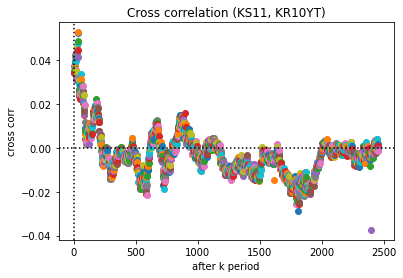

In [68]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_return['1Y_Mid_irs'])
exchange_data = np.array(df_all_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(2457):
    # print(f'1년 irs와 환율과의 {i}일 후 상관계수 값 : {cc[i] : .5f}')

for i in range(2457):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()

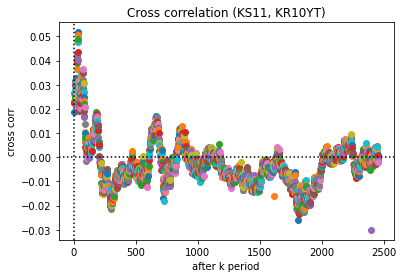

In [69]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_return['2Y_Mid_irs'])
exchange_data = np.array(df_all_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(2457):
    # print(f'2년 irs와 환율과의 {i}일 후 상관계수 값 : {cc[i] : .5f}')

for i in range(2457):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()

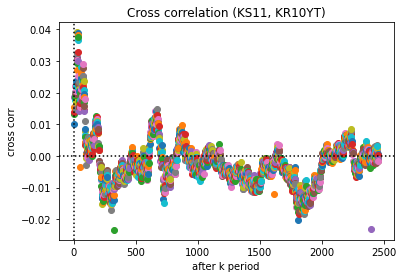

In [70]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_return['3Y_Mid_irs'])
exchange_data = np.array(df_all_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(2457):
    # print(f'3년 irs와 환율과의 {i}일 후 상관계수 값 : {cc[i] : .5f}')')

for i in range(2457):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()

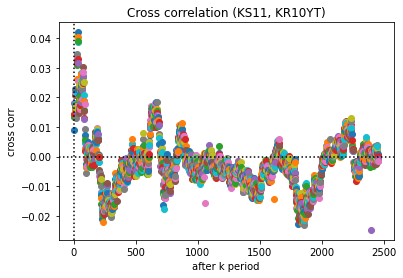

In [71]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_return['5Y_Mid_irs'])
exchange_data = np.array(df_all_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(2457):
   # print(f'5년 irs와 환율과의 {i}일 후 상관계수 값 : {cc[i] : .5f}')

for i in range(2457):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()

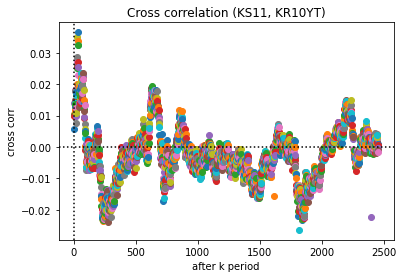

In [72]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_return['10Y_Mid_irs'])
exchange_data = np.array(df_all_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(2457):
   # print(f'10년 irs와 환율과의 {i}일 후 상관계수 값 : {cc[i] : .5f}')

for i in range(2457):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()

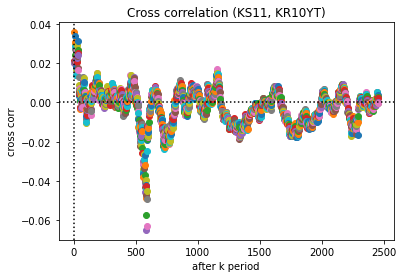

In [73]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_return['1Y_Mid_crs'])
exchange_data = np.array(df_all_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(2457):
   # print(f'1년 crs와 환율과의 {i}일 후 상관계수 값 : {cc[i] : .5f}')

for i in range(2457):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()

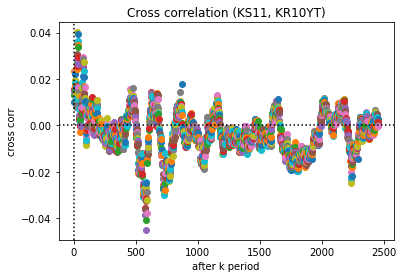

In [74]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_return['2Y_Mid_crs'])
exchange_data = np.array(df_all_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(2457):
   # print(f'2년 crs와 환율과의 {i}일 후 상관계수 값 : {cc[i] : .5f}')

for i in range(2457):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()

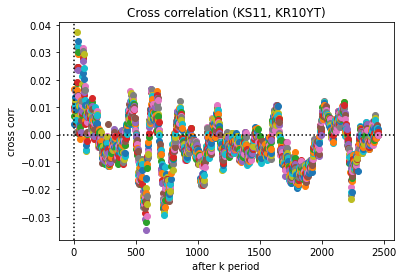

In [75]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_return['3Y_Mid_crs'])
exchange_data = np.array(df_all_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(2457):
    # print(f'3년 crs와 환율과의 {i}일 후 상관계수 값 : {cc[i] : .5f}')

for i in range(2457):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()

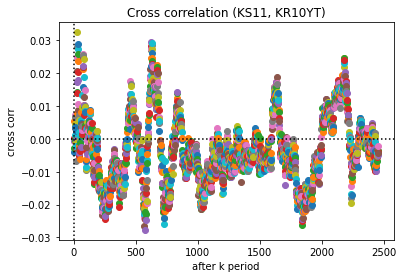

In [76]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_return['5Y_Mid_crs'])
exchange_data = np.array(df_all_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(2457):
    # print(f'5년 crs와 환율과의 {i}일 후 상관계수 값 : {cc[i] : .5f}')

for i in range(2457):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()


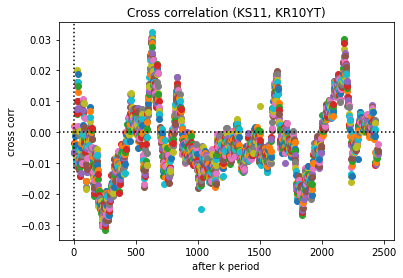

In [77]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_return['10Y_Mid_crs'])
exchange_data = np.array(df_all_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(2457):
    # print(f'10년 crs와 환율과의 {i}일 후 상관계수 값 : {cc[i] : .5f}')

for i in range(2457):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()

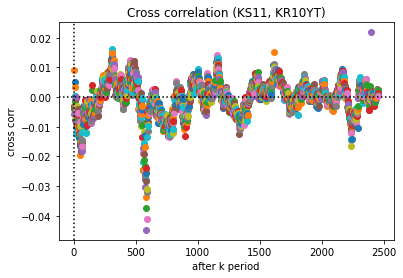

In [78]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_return['1Y_베이시스'])
exchange_data = np.array(df_all_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(2457):
   # print(f'1년 베이시스와 환율과의 {i}일 후 상관계수 값 : {cc[i] : .5f}')

for i in range(2457):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()


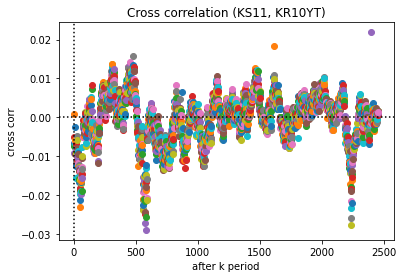

In [79]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_return['2Y_베이시스'])
exchange_data = np.array(df_all_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(2457):
    # print(f'1년 베이시스와 환율과의 {i}일 후 상관계수 값 : {cc[i] : .5f}')

for i in range(2457):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()


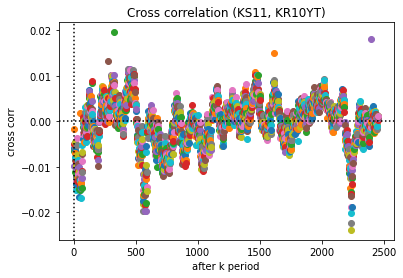

In [80]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_return['3Y_베이시스'])
exchange_data = np.array(df_all_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(2457):
    # print(f'1년 베이시스와 환율과의 {i}일 후 상관계수 값 : {cc[i] : .5f}')

for i in range(2457):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()


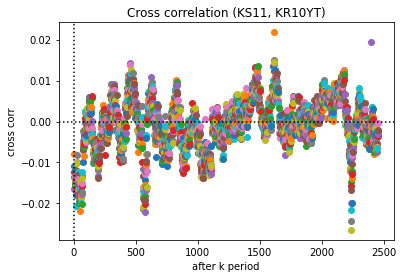

In [81]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_return['5Y_베이시스'])
exchange_data = np.array(df_all_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(2457):
    # print(f'1년 베이시스와 환율과의 {i}일 후 상관계수 값 : {cc[i] : .5f}')

for i in range(2457):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()


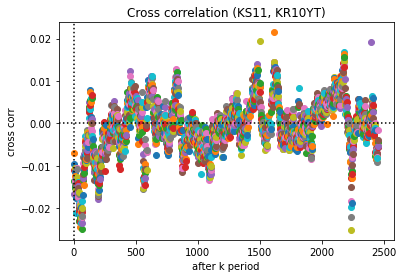

In [82]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_return['10Y_베이시스'])
exchange_data = np.array(df_all_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(2457):
    # print(f'1년 베이시스와 환율과의 {i}일 후 상관계수 값 : {cc[i] : .5f}')

for i in range(2457):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()
